In [ ]:
# importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import re
import nltk 
import spacy
from tqdm import tqdm 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

%matplotlib inline 
pd.set_option('display.max_colwidth', 200)

In [2]:
import tensorflow as tf
from tensorflow import keras 

In [ ]:
# reading the data 

In [3]:
data = pd.read_hdf("auto_tagging_data_v2.h5")

In [3]:
data.head()

,Id,Title,Body,Tags
0,6,The Two Cultures: statistics vs. machine learning?,"<p>Last year, I read a blog post from <a href=""http://anyall.org/"">Brendan O'Connor</a> entitled <a href=""http://anyall.org/blog/2008/12/statistics-vs-machine-learning-fight/"">""Statistics vs. Mach...",[machine-learning]
1,21,Forecasting demographic census,<p>What are some of the ways to forecast demographic census with some validation and calibration techniques?</p>\n\n<p>Some of the concerns:</p>\n\n<ul>\n<li>Census blocks vary in sizes as rural\n...,[forecasting]
2,22,Bayesian and frequentist reasoning in plain English,<p>How would you describe in plain English the characteristics that distinguish Bayesian from Frequentist reasoning?</p>\n,[bayesian]
3,31,What is the meaning of p values and t values in statistical tests?,"<p>After taking a statistics course and then trying to help fellow students, I noticed one subject that inspires much head-desk banging is interpreting the results of statistical hypothesis tests....","[hypothesis-testing, t-test, p-value, interpretation]"
4,36,Examples for teaching: Correlation does not mean causation,"<p>There is an old saying: ""Correlation does not mean causation"". When I teach, I tend to use the following standard examples to illustrate this point:</p>\n\n<ol>\n<li>number of storks and birth ...",[correlation]


In [4]:
data["text"] = data["Title"] + " " + data["Body"]

In [5]:
data.head()

,Id,Title,Body,Tags,text
0,6,The Two Cultures: statistics vs. machine learning?,"<p>Last year, I read a blog post from <a href=""http://anyall.org/"">Brendan O'Connor</a> entitled <a href=""http://anyall.org/blog/2008/12/statistics-vs-machine-learning-fight/"">""Statistics vs. Mach...",[machine-learning],"The Two Cultures: statistics vs. machine learning? <p>Last year, I read a blog post from <a href=""http://anyall.org/"">Brendan O'Connor</a> entitled <a href=""http://anyall.org/blog/2008/12/statisti..."
1,21,Forecasting demographic census,<p>What are some of the ways to forecast demographic census with some validation and calibration techniques?</p>\n\n<p>Some of the concerns:</p>\n\n<ul>\n<li>Census blocks vary in sizes as rural\n...,[forecasting],Forecasting demographic census <p>What are some of the ways to forecast demographic census with some validation and calibration techniques?</p>\n\n<p>Some of the concerns:</p>\n\n<ul>\n<li>Census ...
2,22,Bayesian and frequentist reasoning in plain English,<p>How would you describe in plain English the characteristics that distinguish Bayesian from Frequentist reasoning?</p>\n,[bayesian],Bayesian and frequentist reasoning in plain English <p>How would you describe in plain English the characteristics that distinguish Bayesian from Frequentist reasoning?</p>\n
3,31,What is the meaning of p values and t values in statistical tests?,"<p>After taking a statistics course and then trying to help fellow students, I noticed one subject that inspires much head-desk banging is interpreting the results of statistical hypothesis tests....","[hypothesis-testing, t-test, p-value, interpretation]","What is the meaning of p values and t values in statistical tests? <p>After taking a statistics course and then trying to help fellow students, I noticed one subject that inspires much head-desk b..."
4,36,Examples for teaching: Correlation does not mean causation,"<p>There is an old saying: ""Correlation does not mean causation"". When I teach, I tend to use the following standard examples to illustrate this point:</p>\n\n<ol>\n<li>number of storks and birth ...",[correlation],"Examples for teaching: Correlation does not mean causation <p>There is an old saying: ""Correlation does not mean causation"". When I teach, I tend to use the following standard examples to illustra..."


In [ ]:
# preprocessing and cleaning the data 

In [5]:
def clean_text(text):
    # removing the tags and urls 
    text= re.sub(r'<.*?>', "", text)
    #keeping only the alphabets
    text=re.sub(r'^[a-zA-z]', " ", text)
    # removing white spaces
    text=' '.join(text.split())
    
    return text

In [6]:
data["text"] = data["text"].apply(lambda x:clean_text(x))

In [7]:
data["text"]= data["text"].str.lower()

In [10]:
data["text"].head()

0    he two cultures: statistics vs. machine learning? last year, i read a blog post from brendan o'connor entitled "statistics vs. machine learning, fight!" that discussed some of the differences betw...
1    orecasting demographic census what are some of the ways to forecast demographic census with some validation and calibration techniques? some of the concerns: census blocks vary in sizes as rural a...
2                                       ayesian and frequentist reasoning in plain english how would you describe in plain english the characteristics that distinguish bayesian from frequentist reasoning?
3    hat is the meaning of p values and t values in statistical tests? after taking a statistics course and then trying to help fellow students, i noticed one subject that inspires much head-desk bangi...
4    xamples for teaching: correlation does not mean causation there is an old saying: "correlation does not mean causation". when i teach, i tend to use the following standard exa

In [8]:
from nltk.corpus import stopwords 
stop_words=set(stopwords.words('english'))

In [9]:
def strip_stopwords(text):
    words= [w for w in text.split() if w not in stop_words]
    text_clean= " ".join(words)
    
    return text_clean

In [10]:
data["text_cleaned"] = data["text"].apply(lambda x: strip_stopwords(x))

In [21]:
data.head()

,Id,Title,Body,Tags,text,text_cleaned
0,6,The Two Cultures: statistics vs. machine learning?,"<p>Last year, I read a blog post from <a href=""http://anyall.org/"">Brendan O'Connor</a> entitled <a href=""http://anyall.org/blog/2008/12/statistics-vs-machine-learning-fight/"">""Statistics vs. Mach...",[machine-learning],"he two cultures: statistics vs. machine learning? last year, i read a blog post from brendan o'connor entitled ""statistics vs. machine learning, fight!"" that discussed some of the differences betw...","two cultures: statistics vs. machine learning? last year, read blog post brendan o'connor entitled ""statistics vs. machine learning, fight!"" discussed differences two fields. andrew gelman respond..."
1,21,Forecasting demographic census,<p>What are some of the ways to forecast demographic census with some validation and calibration techniques?</p>\n\n<p>Some of the concerns:</p>\n\n<ul>\n<li>Census blocks vary in sizes as rural\n...,[forecasting],orecasting demographic census what are some of the ways to forecast demographic census with some validation and calibration techniques? some of the concerns: census blocks vary in sizes as rural a...,orecasting demographic census ways forecast demographic census validation calibration techniques? concerns: census blocks vary sizes rural areas lot larger condensed urban areas. need account area...
2,22,Bayesian and frequentist reasoning in plain English,<p>How would you describe in plain English the characteristics that distinguish Bayesian from Frequentist reasoning?</p>\n,[bayesian],ayesian and frequentist reasoning in plain english how would you describe in plain english the characteristics that distinguish bayesian from frequentist reasoning?,ayesian frequentist reasoning plain english would describe plain english characteristics distinguish bayesian frequentist reasoning?
3,31,What is the meaning of p values and t values in statistical tests?,"<p>After taking a statistics course and then trying to help fellow students, I noticed one subject that inspires much head-desk banging is interpreting the results of statistical hypothesis tests....","[hypothesis-testing, t-test, p-value, interpretation]","hat is the meaning of p values and t values in statistical tests? after taking a statistics course and then trying to help fellow students, i noticed one subject that inspires much head-desk bangi...","hat meaning p values values statistical tests? taking statistics course trying help fellow students, noticed one subject inspires much head-desk banging interpreting results statistical hypothesis..."
4,36,Examples for teaching: Correlation does not mean causation,"<p>There is an old saying: ""Correlation does not mean causation"". When I teach, I tend to use the following standard examples to illustrate this point:</p>\n\n<ol>\n<li>number of storks and birth ...",[correlation],"xamples for teaching: correlation does not mean causation there is an old saying: ""correlation does not mean causation"". when i teach, i tend to use the following standard examples to illustrate t...","xamples teaching: correlation mean causation old saying: ""correlation mean causation"". teach, tend use following standard examples illustrate point: number storks birth rate denmark; number priest..."


In [ ]:
# reshaping the target variable 

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

In [12]:
multi_label= MultiLabelBinarizer()
multi_label.fit(data["Tags"])
Y= multi_label.transform(data["Tags"])

In [15]:
Y.shape

(76365, 100)

In [ ]:
# forming the vector representations using TfidfVectorization and Word2Vec model 

In [ ]:
# TFIDF Vectorization 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf= TfidfVectorizer(max_df=0.8, max_features=1000)
#Tfidf = tfidf.fit_transform(data.text_cleaned)
X_tf = tfidf.fit_transform(data["text_cleaned"])

In [15]:
X_tf.shape
#Tfidf.shape

(76365, 1000)

In [220]:
#tfidf_df =  pd.DataFrame.sparse.from_spmatrix(Tfidf, columns=tfidf.get_feature_names(), index= data.text_cleaned.index)

In [221]:
#tfidf_df.iloc[:20, 650:700]

,perhaps,period,person,phi,pi,please,plot,plots,point,points,...,produce,product,project,proportion,proportions,provide,put,python,question,questions
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.097463,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.137920,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
5,0.156849,0.0,0.0,0.0,0.0,0.000000,0.0,0.163612,0.000000,0.000000,...,0.167238,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
6,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
7,0.000000,0.0,0.0,0.0,0.0,0.377486,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.124486,0.182255
8,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
9,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [16]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, Y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
from sklearn import svm
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [18]:
lr = LogisticRegression()
#svc = svm.SVC(kernel='linear', C=1, probability=True)
clf = OneVsRestClassifier(lr)

In [19]:
clf.fit(X_train_tf, y_train_tf)

OneVsRestClassifier(estimator=LogisticRegression())

In [23]:
y_pred_prob = clf.predict_proba(X_test_tf)

In [24]:
# set threshold value
t = 0.45

# convert to integers
y = (y_pred_prob >= t).astype(int)
f1_score(y_test_tf, y, average="micro")

0.4480622898602018

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test_tf, y)*100, "%")

Accuracy: 14.856282328291757 %


In [ ]:
# Word2Vec model 

In [42]:
from gensim.utils import simple_preprocess

In [43]:
X = data.text_cleaned.apply(lambda x: simple_preprocess(x))

In [44]:
from gensim.models import Word2Vec 

In [45]:
w2v_model = Word2Vec(X, size=300, min_count=2, sg=1, negative= 5)

In [ ]:
# vocabulary and its size

In [46]:
print('vocabulary size:', len(w2v_model.wv.vocab))

vocabulary size: 59678


In [69]:
list(w2v_model.wv.vocab.items())[:20]

[('two', <gensim.models.keyedvectors.Vocab at 0x20d89c543c8>),
 ('cultures', <gensim.models.keyedvectors.Vocab at 0x20d89967748>),
 ('statistics', <gensim.models.keyedvectors.Vocab at 0x20d89c25988>),
 ('vs', <gensim.models.keyedvectors.Vocab at 0x20d89c255c8>),
 ('machine', <gensim.models.keyedvectors.Vocab at 0x20d89c6fc48>),
 ('learning', <gensim.models.keyedvectors.Vocab at 0x20d89c6fa08>),
 ('last', <gensim.models.keyedvectors.Vocab at 0x20d89c6f408>),
 ('year', <gensim.models.keyedvectors.Vocab at 0x20d89c6f608>),
 ('read', <gensim.models.keyedvectors.Vocab at 0x20d89c25108>),
 ('blog', <gensim.models.keyedvectors.Vocab at 0x20d89c6f748>),
 ('post', <gensim.models.keyedvectors.Vocab at 0x20d89c6ff88>),
 ('brendan', <gensim.models.keyedvectors.Vocab at 0x20d89c6f3c8>),
 ('connor', <gensim.models.keyedvectors.Vocab at 0x20d89c6fa48>),
 ('entitled', <gensim.models.keyedvectors.Vocab at 0x20d89c6f9c8>),
 ('fight', <gensim.models.keyedvectors.Vocab at 0x20d89c6fdc8>),
 ('discussed', <

In [ ]:
# finding the contextually similar words for a given word 

In [117]:
words_statistics = w2v_model.wv.most_similar('statistics')
words_statistics

[('undergraduate', 0.7534754276275635),
 ('stats', 0.7449577450752258),
 ('prerequisites', 0.73811274766922),
 ('craig', 0.7380141019821167),
 ('coursework', 0.7370071411132812),
 ('biostatistics', 0.736904501914978),
 ('brushing', 0.728969931602478),
 ('syllabus', 0.7274842858314514),
 ('inferential', 0.7251176834106445),
 ('discovering', 0.7239354252815247)]

In [ ]:
# visualizaing the word embeddings 

In [47]:
# generate similar word lists
words_statistics = w2v_model.wv.most_similar('statistics')
words_algorithm = w2v_model.wv.most_similar('algorithm')
words_value = w2v_model.wv.most_similar('value')
# combine word lists 
words = words_statistics + words_algorithm + words_value

# extract only the word and not the similarity score
words = list(map(lambda x: x[0], words))

In [48]:
from matplotlib import pyplot
from sklearn.decomposition import PCA

# plots w2v embeddings of a given word list
def plot_w2v(word_list):
    X = w2v_model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    # create a scatter plot of the projection
    pyplot.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    # show
    pyplot.figure(figsize=(6,15))
    pyplot.show()

E:\softwares\envs\tf\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


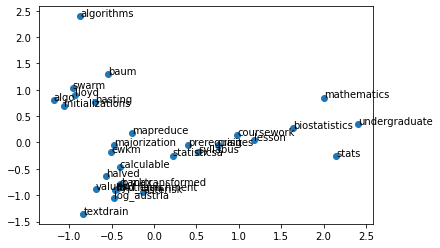

<Figure size 432x1080 with 0 Axes>

In [49]:
plot_w2v(words)

In [ ]:
# creating the "X" from our Word2Vec model developed above 

In [50]:
# returns vector reperesentation of a given word if it is present in vocabulary
def get_embedding_w2v(doc_tokens):
    embeddings = []
    model = w2v_model
    # iterate over tokens to extract their vectors    
    for tok in doc_tokens:
        if tok in model.wv.vocab:
            embeddings.append(model.wv.word_vec(tok))
    # mean the vectors of individual words to get the vector of the statement
    return np.mean(embeddings, axis=0)

In [51]:
X_w2v_model = X.apply(lambda x: get_embedding_w2v(x))
X_w2v_model = pd.DataFrame(X_w2v_model.tolist())
print('X shape:', X_w2v_model.shape)


X shape: (76365, 300)


In [52]:
X_train_wm, X_test_wm, y_train_wm, y_test_wm = train_test_split(X_w2v_model, Y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [54]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [55]:
clf.fit(X_train_wm, y_train_wm)

E:\softwares\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\softwares\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\softwares\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\softwares\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\softwares\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\softwares\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\softwares\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\softwares\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsRestClassifier(estimator=LogisticRegression())

In [56]:
y_pred_prob = clf.predict_proba(X_test_wm)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
# set threshold value
t = 0.45

# convert to integers
y = (y_pred_prob >= t).astype(int)
f1_score(y_test_wm, y, average="micro")

0.40506904069767447

In [60]:
print("Accuracy:", accuracy_score(y_test_wm, y)*100, "%")

Accuracy: 12.70870163032803 %
